In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from bbbc041_utils import annotate, reject_fpr_tpr, shapxrt_heatmap

root_dir = "../../"
data_dir = os.path.join("data")
figure_dir = os.path.join(root_dir, "figures", "BBBC041")
os.makedirs(figure_dir, exist_ok=True)

demo_image = "2f6224be-50d0-4e85-94ef-88315df561b6"
demo_image_path = os.path.join("demo", f"{demo_image}.png")

sns.set_theme()
sns.set_context("paper", font_scale=1.8)

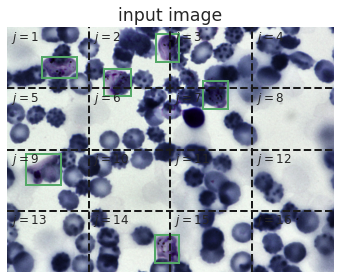

In [2]:
image = Image.open(demo_image_path)
w, h = image.size
gamma, gamma_per_dim = 16, 4

_, ax = plt.subplots(figsize=(16 / 2, 9 / 2))
ax.imshow(image)
ax.axis("off")
ax.set_title("input image")
annotate(demo_image, ax)
for i in range(1, gamma_per_dim):
    ax.axvline(i * w // gamma_per_dim, c = "k", linestyle="--", linewidth=2)
    ax.axhline(i * h // gamma_per_dim, c = "k", linestyle="--", linewidth=2)
for j in range(gamma):
    xcoord = (j % 4 * w // gamma_per_dim) + 20
    ycoord = (j // 4 * h // gamma_per_dim) + 65
    ax.text(xcoord, ycoord, f"$j = %d$" % (j+1), fontsize="x-small")

plt.savefig(os.path.join(figure_dir, "input_16.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(figure_dir, "input_16.png"), bbox_inches="tight")
plt.show()

100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


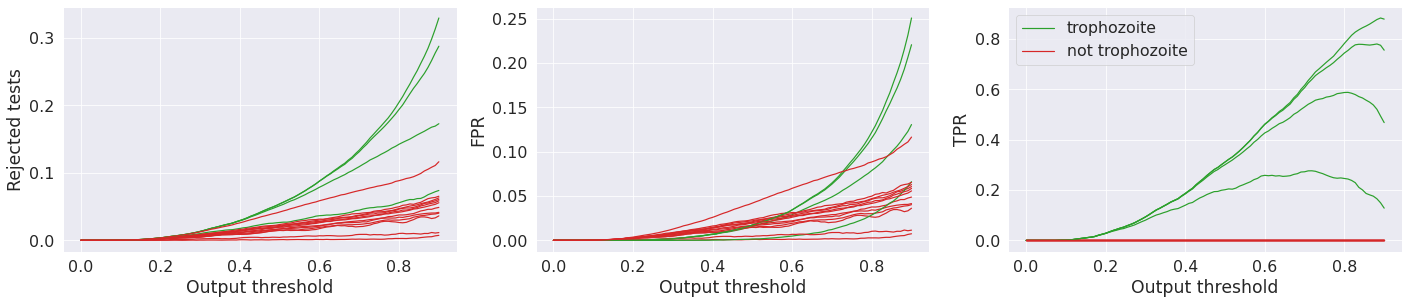

In [3]:
true_feature_trophozoite = [1, 2, 9, 14]
thresholds, reject, fpr, tpr = reject_fpr_tpr(gamma, true_feature_trophozoite)

_, axes = plt.subplots(1, 3, figsize=(3 / 2 * 16, 9 / 2))
first_trophozoite, first_not_trophozoite = True, True
for j in range(1, gamma + 1):
    is_j_trophozoite = j in true_feature_trophozoite
    c = "#2ca02c" if is_j_trophozoite else "#d62728"
    label = "trophozoite" if is_j_trophozoite else "not trophozoite"
    print_legend = (
        True
        if (is_j_trophozoite and first_trophozoite)
        or (not is_j_trophozoite and first_not_trophozoite)
        else False
    )

    ax = axes[0]
    ax.plot(thresholds, reject[j], c=c)

    ax = axes[1]
    ax.plot(thresholds, fpr[j], c=c)

    ax = axes[2]
    ax.plot(thresholds, tpr[j], c=c, label=label if print_legend else None)

    if print_legend and is_j_trophozoite:
        first_trophozoite = False
    if print_legend and not is_j_trophozoite:
        first_not_trophozoite = False

ax = axes[0]
ax.set_xlabel("Output threshold")
ax.set_ylabel("Rejected tests")

ax = axes[1]
ax.set_xlabel("Output threshold")
ax.set_ylabel("FPR")

ax = axes[2]
ax.set_xlabel("Output threshold")
ax.set_ylabel("TPR")
ax.legend()
plt.savefig(os.path.join(figure_dir, "reject_fpr_tpr_16.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(figure_dir, "reject_fpr_tpr_16.png"), bbox_inches="tight")
plt.show()

In [4]:
reject_sort_features = sorted(reject.keys(), key=lambda x: reject[x][-10])
fpr_sort_features = sorted(fpr.keys(), key=lambda x: fpr[x][-10])
tpr_sort_features = sorted(tpr.keys(), key=lambda x: tpr[x][-10])
print(reject_sort_features)
print(fpr_sort_features)
print(tpr_sort_features)

[6, 10, 8, 7, 3, 5, 16, 13, 4, 12, 11, 9, 15, 1, 14, 2]
[6, 10, 8, 7, 9, 3, 5, 16, 13, 4, 12, 11, 1, 15, 14, 2]
[3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 9, 1, 14, 2]


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


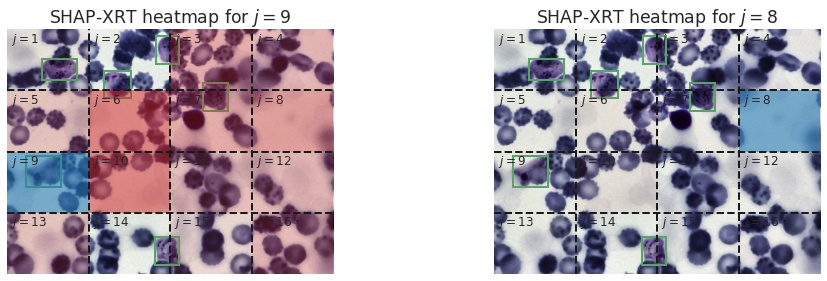

In [5]:
_, axes = plt.subplots(1, 2, figsize=(16, 9 / 2))
for ax in axes:
    ax.imshow(image)
    ax.axis("off")
    annotate(demo_image, ax)
    for i in range(1, gamma_per_dim):
        ax.axvline(i * w // gamma_per_dim, c="k", linestyle="--", linewidth=2)
        ax.axhline(i * h // gamma_per_dim, c="k", linestyle="--", linewidth=2)
    for j in range(gamma):
        xcoord = (j % 4 * w // gamma_per_dim) + 20
        ycoord = (j // 4 * h // gamma_per_dim) + 65
        ax.text(xcoord, ycoord, f"$j = %d$" % (j + 1), fontsize="x-small")

ax = axes[0]
shapxrt_heatmap(ax, h, w, 9, gamma)
ax.set_title("SHAP-XRT heatmap for $j = 9$")

ax = axes[1]
shapxrt_heatmap(ax, h, w, 8, gamma)
ax.set_title("SHAP-XRT heatmap for $j = 8$")
plt.savefig(os.path.join(figure_dir, "shapxrt_heatmap_16.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(figure_dir, "shapxrt_heatmap_16.png"), bbox_inches="tight")
plt.show()

In [6]:
2**15

32768